# Mid Test Artificial Neural Network

Gabriela Nathania H.<br>
2201797494<br>
LA01<br>

# Answer Number 1

### Rancangan Model

* **Neural Network:** Single Layer Perceptron

* **Input:** 81 neuron <br> 
Karena ukuran gambar adalah 9x9 pixel, maka setiap pixelnya akan menjadi 1 input. Untuk pixel yang berwarna hitam direpresentasikan dengan 1 dan pixel berwarna putih direpresentasikan dengan 0
* **Weight dan Bias:** 0

* **Activation Function:**Binary Step

* **Output:** 1 neuron <br>
Untuk gambar Tank prediksi outputnya direpresentasikan dengan 1 dan untuk gambar House prediksi outputnya direpresentasikan dengan 0

### Model Training

Import Library yang Digunakan




In [ ]:
import random
import numpy as np

Mendefinisikan Input dan Target

In [ ]:
#input
x = np.array([
     [0,0,0,0,0,0,0,0,0,
     0,0,0,0,1,0,0,0,0,
     0,0,1,0,1,0,1,0,0,
     0,0,1,1,1,1,1,0,0,
     0,0,1,1,1,1,1,0,0,
     0,0,1,1,1,1,1,0,0,
     0,0,1,1,1,1,1,0,0,
     0,0,1,0,1,0,1,0,0,
     0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,
     0,0,0,0,1,0,0,0,0,
     0,0,0,1,1,1,0,0,0,
     0,0,1,1,1,1,1,0,0,
     0,1,1,1,1,1,1,1,0,
     0,1,0,0,1,1,0,1,0,
     0,1,1,1,1,1,1,1,0,
     0,1,1,1,1,1,1,1,0,
     0,0,0,0,0,0,0,0,0]
])

#target
t = np.array([1,0])

Activation Function : Binary Step

In [ ]:
def step(x):
  if x<0: return 0
  return 1

Set Weight dan Bias

In [ ]:
w = np.zeros(81)
b = 0

Set Learning Rate (alpha) dan Banyak Iterasi (epoch)

In [ ]:
alpha = 0.7
epoch = 500

**Training Model**<br>

*   Membuat input data train yang memiliki noise pixel (dari 0 hingga 40 noise)<br>
Memilih n (banyaknya noise yang akan dibuat) posisi berbeda secara acak pada data input bersih yang dipilih secara acak, kemudian melakukan flip (dari 1 ke 0 dan sebaliknya)
*   Untuk setiap banyaknya pixel noise, dilakukan training sebanyak epoch
* Akurasi dihitung dari banyaknya prediksi yang benar terhadap total data yang diprediksi untuk setiap banyaknya noise



In [ ]:
for noise in range(41): #try number of noise pixel form 0 (no noise) till 40 noise pixel
  tot = 0
  for iter in range(epoch):
    nn = noise

    #choose expected input to be modified
    pick = random.randint(0,1)
    inp = x[pick].copy()
    out = t[pick]

    #modify input so it has nn pixel noise
    modify = set()

    while nn>0:
      pos = random.randint(0,80)
      while pos in modify:
        pos = random.randint(0,80)
      modify.add(pos)
      inp[pos] ^= 1 #flip pixel
      nn-=1
    
    #accumulator
    u = w.dot(inp) + b

    #activation function
    y = step(u)

    #error
    e = out-y

    #update weight and bias
    w += inp*e*alpha
    b += e*alpha

    #count correct classification
    if e== 0: tot += 1

  acc = tot/epoch
  print("noise: {} accuracy: {:.2f}%".format(noise,acc*100))
  

noise: 0 accuracy: 99.60%
noise: 1 accuracy: 100.00%
noise: 2 accuracy: 100.00%
noise: 3 accuracy: 100.00%
noise: 4 accuracy: 100.00%
noise: 5 accuracy: 100.00%
noise: 6 accuracy: 100.00%
noise: 7 accuracy: 100.00%
noise: 8 accuracy: 99.20%
noise: 9 accuracy: 98.80%
noise: 10 accuracy: 99.80%
noise: 11 accuracy: 99.60%
noise: 12 accuracy: 99.40%
noise: 13 accuracy: 99.80%
noise: 14 accuracy: 99.60%
noise: 15 accuracy: 100.00%
noise: 16 accuracy: 99.60%
noise: 17 accuracy: 99.00%
noise: 18 accuracy: 99.60%
noise: 19 accuracy: 99.20%
noise: 20 accuracy: 97.40%
noise: 21 accuracy: 96.80%
noise: 22 accuracy: 97.20%
noise: 23 accuracy: 95.00%
noise: 24 accuracy: 94.20%
noise: 25 accuracy: 92.20%
noise: 26 accuracy: 90.40%
noise: 27 accuracy: 90.00%
noise: 28 accuracy: 90.60%
noise: 29 accuracy: 85.20%
noise: 30 accuracy: 84.00%
noise: 31 accuracy: 77.80%
noise: 32 accuracy: 78.80%
noise: 33 accuracy: 79.00%
noise: 34 accuracy: 69.40%
noise: 35 accuracy: 66.60%
noise: 36 accuracy: 65.20%
noi

### Analisa

Dari hasil akurasi yang didapat untuk setiap banyaknya noise yang ada, dapat dilihat bahwa:
* model masih sangat akurat melakukan klasifikasi dengan input yang mempunyai noise terbanyak 10 hingga 20 (nilai akurasi 97% - 100%)
* semakin banyak noise semakin rendah nilai akurasinya

# Answer Number 2

### Menentukan Weight dan Bias Berdasarkan Analisa Persamaan Garis Pembatas

<img src="https://drive.google.com/uc?id=1OHg2Lfito2CxbHxCSrUH-lRmahwh-ehk" width="500">
<br>
<img src="https://drive.google.com/uc?id=1cW4Z43et5U-LFkXraObu3Bu9777SSzfx" width="500">
<br>
<img src="https://drive.google.com/uc?id=1tTAHQmmr7rqCFMDVeeGyOzhUK9RRdZu_" width="500">

### Melakukan Uji Coba Terhadap Beberapa Contoh Training Data

Import Library yang Digunakan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Set Input (x1,x2) dan Target

In [ ]:
#input
x1x2 = [
  [3    ,   1.7],
  [2.8  ,   1.5],
  [2.8  ,   2.5],
  [3.5  ,   1.6],
  [3    ,   2.1],

  [4.5  ,   1.3],
  [4.2  ,   1.0],
  [5.4  ,   1.9],
  [5.5  ,   2.1],
  [3    ,   0.6],
  [2    ,   1.2],

  [0.4  ,   3.3],
  [0.3  ,   3.5],
  [1    ,   2.4],
  [1.3  ,   2.0],
  [1.6  ,   2.7],
  [3.5  ,   0.7]
]

#target
target = [
  1,1,1,1,1,
  0,0,0,0,0,0,
  0,0,0,0,0,0 
]


Plot Garis Pembatas Dikoordinat (x1,x2)

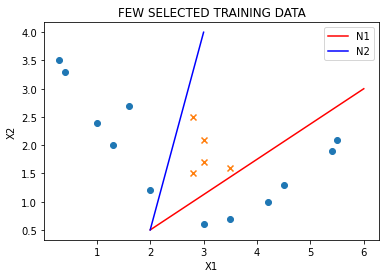

In [ ]:
plt.scatter([x[0] for x in x1x2[5:]],[x[1] for x in x1x2[5:]],marker='o')
plt.scatter([x[0] for x in x1x2[:5]],[x[1] for x in x1x2[:5]],marker='x')
plt.title("FEW SELECTED TRAINING DATA")
plt.xlabel("X1")
plt.ylabel("X2")

x = np.linspace(2,6)
y = 5/8*x-3/4
plt.plot(x, y, '-r', label='N1')

x = np.linspace(2,3)
y = 7/2*x-13/2
plt.plot(x, y, '-b', label='N2')

plt.legend()

Activation Function: Sigmoid

In [ ]:
def sig(x):
  return 1/(1+np.exp(-x))

Set Weight dan Bias untuk N1 dan N2

In [ ]:
w1 = [5 ,  -8]
b1 = -6
w2 = [7 ,  -2]
b2 = -13

Hitung v1 dan v2 Berdasarkan (x1,x2), Weight, dan Bias yang Telah Ditentukan. 

In [ ]:
v1v2 = []

for x in x1x2:
  v1 = sig(np.dot(w1,x)+b1)
  v2 = sig(np.dot(w2,x)+b2)
  v1v2.append([v1,v2])

Plot Garis Pembatas Terhadap Data pada Koordinat (V1,V2)

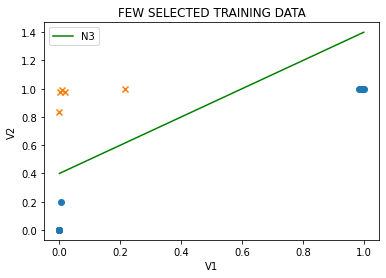

In [ ]:
plt.scatter([v[0] for v in v1v2[5:]],[v[1] for v in v1v2[5:]],marker='o')
plt.scatter([v[0] for v in v1v2[:5]],[v[1] for v in v1v2[:5]],marker='x')
plt.title("FEW SELECTED TRAINING DATA")
plt.xlabel("V1")
plt.ylabel("V2")

x = np.linspace(0,1)
y = x+0.4
plt.plot(x, y, '-g', label='N3')

plt.legend()

Set Weight dan Bias untuk N3

In [ ]:
w3 = [-10,10]
b3 = -4

Hitung Y Berdasarkan V1 dan V2

In [ ]:
output = []

for v in v1v2:
  y = sig(np.dot(w3,v)+b3)
  output.append(round(y,1))

Hasil Pediksi dari Model Telah Konvergen menggunakan Weight dan Bias yang Telah Ditentukan

In [ ]:
print("prediction   :", output[:5])
print("target       :", target[:5])

print("prediction   :", output[5:])
print("target       :", target[5:])

prediction   : [1.0, 1.0, 1.0, 1.0, 1.0]
target       : [1, 1, 1, 1, 1]
prediction   : [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
target       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Answer Number 3

### BPNN Model

Import Library yang Digunakan

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Dataset

In [ ]:
digits = load_digits()

Activation Function : Sigmoid

In [ ]:
def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

Model Calculation

In [ ]:
#training
def fit(input,target, alpha):
  global hiddenWeight, hiddenBiases, outputWeight, outputBiases

  # forward
  hiddenAccumulator = np.dot(input,hiddenWeight) +  hiddenBiases
  hiddenOutput = sig(hiddenAccumulator)

  outputAccumulator = np.dot(hiddenOutput, outputWeight) +  outputBiases
  outputPrediction = sig(outputAccumulator)

  # error and delta
  error = target - outputPrediction
  d_output = error * sig(outputPrediction,True)

  errorHidden = d_output.dot(outputWeight.T)
  d_hidden = errorHidden * sig(hiddenOutput, True)
  
  # backpropagation and updates
  outputWeight += hiddenOutput.T.dot(d_output) *alpha
  outputBiases += np.sum(d_output, axis=0, keepdims=True)*alpha

  hiddenWeight += input.T.dot(d_hidden) * alpha
  hiddenBiases += np.sum(d_hidden, axis=0, keepdims=True) * alpha

  return outputPrediction

  #testing
def predict(input):
  global hiddenWeight, hiddenBiases, outputWeight, outputBiases

  # forward
  hiddenAccumulator = np.dot(input,hiddenWeight) +  hiddenBiases
  hiddenOutput = sig(hiddenAccumulator)

  outputAccumulator = np.dot(hiddenOutput, outputWeight) +  outputBiases
  outputPrediction = sig(outputAccumulator)

  return outputPrediction

Set Input dan Target

In [ ]:
# input
data = digits.data

# target       
actual = digits.target

Normalisasi Input Data

In [ ]:
normalizer = StandardScaler()
data = normalizer.fit_transform(data)

Split Data (Train 80% dan Test 20%)

In [ ]:
x_train, x_test, actual_y_train, actual_y_test = train_test_split(data,actual,test_size=0.2)

One-Hot Encoding Target

In [ ]:
y_train = np.zeros((actual_y_train.size, actual_y_train.max()+1))
y_train[np.arange(actual_y_train.size),actual_y_train] = 1

y_test = np.zeros((actual_y_test.size, actual_y_test.max()+1))
y_test[np.arange(actual_y_test.size),actual_y_test] = 1

Set Learning Rate (alpha) dan Banyak Iterasi (epcoh)

In [ ]:
alpha = 0.008
epoch = 250000

Arsitektur Model

In [ ]:
inputLayer, hiddenLayer, outputLayer = 64,24,10

Set Weight dan Bias Secara Acak

In [ ]:
hiddenWeight = 2*np.random.random((inputLayer,hiddenLayer))-1
hiddenBiases = 2*np.random.random((1,hiddenLayer))-1

outputWeight = 2*np.random.random((hiddenLayer,outputLayer))-1
outputBiases = 2*np.random.random((1,outputLayer))-1

List untuk Mencatat Akurasi

In [ ]:
accHistoryTrain = []
accHistoryTest = []

### Training dan Testing Model

Untuk setiap iterasi n, model akan melaksanakan training dan testing sehingga memperoleh nilai akurasi untuk n iterasi. Kemudian akurasi dari training dan testing tersebut dicatat sehingga dapat menggambar validation curve pada akhirnya.<br><br>

In [ ]:
# train and test the model over every epoch iteration (1 to epoch)
for n in range(epoch):
  
  # tain the model with n epoch
  y_pred_train = fit(x_train,y_train,alpha)
  accHistoryTrain.append(accuracy_score(np.argmax(y_pred_train, axis=1), actual_y_train))
  actual_y_pred_train = np.argmax(y_pred_train, axis=1)

  # test the model
  y_pred_test = predict(x_test)
  accHistoryTest.append(accuracy_score(np.argmax(y_pred_test, axis=1), actual_y_test))
  actual_y_pred_test = np.argmax(y_pred_test, axis=1)

  if (n+1)%10000 == 0:
    print("Percobaan untuk max_epoch = {}\nakurasi train = {:.2f}%\nakurasi test = {:.2f}%".format( n++1,accHistoryTrain[-1]*100,accHistoryTest[-1]*100))


Percobaan untuk max_epoch = 10000
akurasi train = 99.86%
akurasi test = 96.39%
Percobaan untuk max_epoch = 20000
akurasi train = 99.93%
akurasi test = 96.39%
Percobaan untuk max_epoch = 30000
akurasi train = 99.93%
akurasi test = 96.67%
Percobaan untuk max_epoch = 40000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 50000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 60000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 70000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 80000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 90000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 100000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 110000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 120000
akurasi train = 99.93%
akurasi test = 96.94%
Percobaan untuk max_epoch = 130000
akurasi train 

### Evaluation
*   Validation Curve (Accuracy over epoch)
*   Confusion Matrix
*   Accuracy
*   Precision, Recall, F1

**Ploting Validation Curve (Accuracy over epoch)<br>**
Validation Curve menunjukan perbandingan peforma model saat training dan testing sehingga dapat menentukan apakah underfitting atau overfitting. Pada ploting ini tidak terlihat indikasi overfiting maupun underfitting, performa saat training dengan saat testing cukup seimbang.






Output After Training with Max Epoch:
[8 6 0 0 7 6 7 3 0 2]
[8 6 0 0 7 6 7 3 0 2]


Validation Curve : Accuracy over Epoch


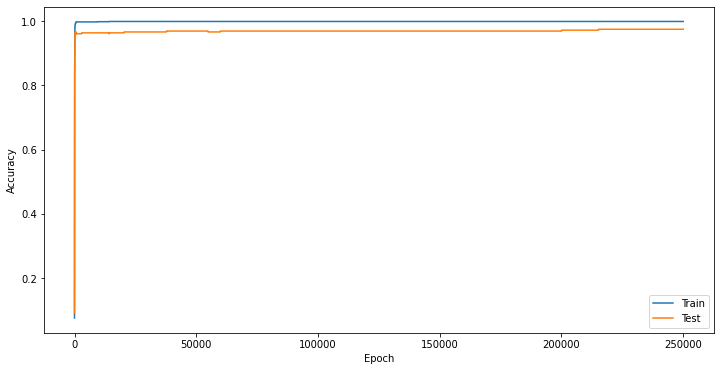

In [ ]:
print("Output After Training with Max Epoch:")
print(np.argmax(y_pred_test, axis=1)[:10])
print(actual_y_test[:10])

print("\n")
print("Validation Curve : Accuracy over Epoch")
plt.figure(figsize=(12,6))
plt.plot(np.arange(epoch), accHistoryTrain,label="Train")
plt.plot(np.arange(epoch), accHistoryTest,label="Test")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

**Confusion Matrix**

Text(0.5, 15.0, 'Predicted label')

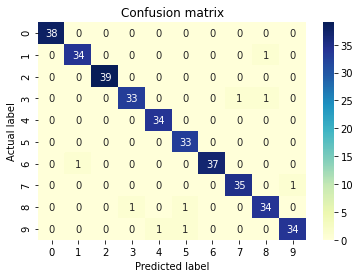

In [ ]:
cnf_matrix = metrics.confusion_matrix(actual_y_test, actual_y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy<br>**
Menghitung perbandingan prediksi yang benar dengan total data yang diprediksi pada **TEST DATASET**

In [ ]:
print("Accuracy  Training : {:.2f}%".format(accuracy_score(actual_y_train,actual_y_pred_train)*100) )
print("Accuracy  Testing  : {:.2f}%".format(accuracy_score(actual_y_test,actual_y_pred_test)*100) )

Accuracy  Training : 99.93%
Accuracy  Testing  : 97.50%


**Precision, Recall, and F1-Score** of each class

In [ ]:
analysis = precision_recall_fscore_support(actual_y_test,actual_y_pred_test, zero_division=0)

for i,u in enumerate(analysis):
  for j,v in enumerate(u):
    analysis[i][j] = round(v,2)

print("\nAnalysis for each class:")
print("Precision  : ",analysis[0])
print("Recal      : ",analysis[1])
print("F1-score   : ",analysis[2])


Analysis for each class:
Precision  :  [1.   0.97 1.   0.97 0.97 0.94 1.   0.97 0.94 0.97]
Recal      :  [1.   0.97 1.   0.94 1.   1.   0.97 0.97 0.94 0.94]
F1-score   :  [1.   0.97 1.   0.96 0.99 0.97 0.99 0.97 0.94 0.96]


# Answer Number 4

### ERNN Model

Import Library yang Digunakan

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Activation Function: Sigmoid

In [ ]:
def sig(x,deriv=False):
  if(deriv==True):
      return x*(1-x)
  return 1/(1+np.exp(-x))

Model Calculation

In [ ]:
def fit(input,target, alpha, e, context_neuron):
  errorhis = []
  global hiddenWeight, hiddenBiases, outputWeight, outputBiases

  for iter in range(e):
    # forward
    hiddenAccumulator = np.dot(input,hiddenWeight) +  hiddenBiases
    hiddenOutput = sig(hiddenAccumulator)

    outputAccumulator = np.dot(hiddenOutput, outputWeight) +  outputBiases
    outputPrediction = sig(outputAccumulator)

    # error and delta
    error = target - outputPrediction
    d_output = error * sig(outputPrediction,True)

    errorHidden = d_output.dot(outputWeight.T)
    d_hidden = errorHidden * sig(hiddenOutput, True)
    
    # backpropagation and updates
    outputWeight += hiddenOutput.T.dot(d_output) *alpha
    outputBiases += np.sum(d_output, axis=0, keepdims=True)*alpha

    hiddenWeight += input.T.dot(d_hidden) * alpha
    hiddenBiases += np.sum(d_hidden, axis=0, keepdims=True) * alpha

    if (iter+1) % 100000 == 0: 
      print("Error iter {}: ".format(iter), str(np.mean(np.abs(error))))
    
    #recod history of error
    errorhis.append(np.mean(np.abs(error)))

    #feedback hidden to input
    for i in range(len(input)):
      input[i][:context_neuron] = hiddenOutput[i]

  plt.plot(np.arange(len(errorhis)),errorhis)
  return outputPrediction

Mendefinisikan Input dan Target

In [ ]:
# input
data = np.array([
    [ 1, 0, 0, 0 ],
    [ 0, 1, 0, 0 ],
    [ 0, 0, 1, 0 ],
    [ 0, 0, 0, 1 ],
    [ 0, 0, 1, 0 ],
    [ 0, 1, 0, 0 ],
]).astype(float)

# target       
target = np.array([
    [ 0, 1, 0, 0 ],
    [ 0, 0, 1, 0 ],
    [ 0, 0, 0, 1 ],
    [ 0, 0, 1, 0 ],
    [ 0, 1, 0, 0 ],
    [ 1, 0, 0, 0 ]
])

Set Learning Rate (alpha) dan Banyak Iterasi (epcoh)

In [ ]:
alpha = 0.8
epoch = 5000000

Arsitektur Model

In [ ]:
outputLayer = 4
hiddenLayer = context_neuron = 5
inputLayer = 4 + context_neuron

Mempersiapkan Context Neuron

In [ ]:
context = np.zeros(context_neuron)
input = np.zeros((len(data),inputLayer)).astype(float)
for i in range(len(data)):
  input[i] = np.concatenate((context, data[i]))

print(input)

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Set Weight dan Bias secara acak

In [ ]:
# initialize weights and biases
hiddenWeight = 2*np.random.random((inputLayer,hiddenLayer))-1
hiddenBiases = 2*np.random.random((1,hiddenLayer))-1

outputWeight = 2*np.random.random((hiddenLayer,outputLayer))-1
outputBiases = 2*np.random.random((1,outputLayer))-1

Training Model

Error iter 99999:  0.16758581493075556
Error iter 199999:  0.16731275777498592
Error iter 299999:  0.16719244411131898
Error iter 399999:  0.1671209504224108
Error iter 499999:  0.16707227111101455
Error iter 599999:  0.16703640083314344
Error iter 699999:  0.16700856270795272
Error iter 799999:  0.16698615048257923
Error iter 899999:  0.16696760580369918
Error iter 999999:  0.166951932254812
Error iter 1099999:  0.16693845915131997
Error iter 1199999:  0.16692671633185188
Error iter 1299999:  0.16691636314811728
Error iter 1399999:  0.1669071459475858
Error iter 1499999:  0.16689887145552887
Error iter 1599999:  0.1668913894769745
Error iter 1699999:  0.1668845812928175
Error iter 1799999:  0.16687835166001364
Error iter 1899999:  0.16687262316368265
Error iter 1999999:  0.16686733214545177
Error iter 2099999:  0.16686242571328982
Error iter 2199999:  0.1668578595090057
Error iter 2299999:  0.1668535960165359
Error iter 2399999:  0.16684960326274956
Error iter 2499999:  0.166845853807

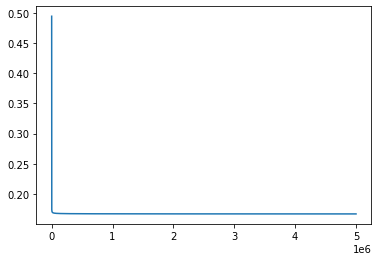

In [ ]:
forcast = fit(input,target, alpha, epoch, context_neuron)

Print Hasil Prediksi dari Model 

In [ ]:
highest = np.zeros((len(forcast),outputLayer))
for i in range(len(forcast)):
  highest[i][np.argmax(forcast[i])] = 1

rounded = np.zeros((len(forcast),outputLayer))
for i in range(len(forcast)):
  rounded[i] = [round(x,0) for x in forcast[i]]
print("Raw Forcast Result")
print(forcast)
print("\n")
print("Select The Highest in a Row")
print(highest)
print("\n")
print("Round The Value")
print(rounded)

Raw Forcast Result
[[1.77303459e-04 9.99696865e-01 1.98016292e-04 1.67102380e-04]
 [4.99999841e-01 1.47682813e-04 5.00000008e-01 1.73517182e-04]
 [1.67648575e-04 5.00000032e-01 1.87297153e-04 4.99999854e-01]
 [1.87934086e-04 2.08401080e-04 9.99701574e-01 1.33297401e-04]
 [1.67648575e-04 5.00000032e-01 1.87297153e-04 4.99999854e-01]
 [4.99999841e-01 1.47682813e-04 5.00000008e-01 1.73517182e-04]]


Select The Highest in a Row
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


Round The Value
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


Dari hasil prediksi model, dapat dilihat nilai yang cukup konvergen. Namun, untuk dua data dengan nilai input sama tetapi outputnya berbeda, model masih menunjukan nilai yang konvergen disemua kemungkinan output. Misalnya pada data ke 2 dan 6 serta data ke 3 dan 5. <br><br>
Idealnya model dapat memprediksi output yang diharapkan walaupun pada input kedua data mempunyai nilai yang sama, tetapi jika dilihat dari state sebelumnya (input data sebelumnya), kedua data tersebut memiliki state yang berbeda.

### Time Series Forecasting 

***Times Series Forcasting*** adalah model yang melakukan prediksi/peramalaan pada data yang bergantung pada waktu (*time series data*) untuk jangka waktu tertentu. Dalam melakukan prediksi, model ini memperhatikan urutan data yang didasarkan pada periode waktu tertentu. Untuk menangani *time series data*, diperlukan model yang dapat mengkalkulasi korelasi antarfase proses. Salah satu metodenya adalah RNN.<br><br>

RNN berjalan layaknya ANN pada umumnya, tetapi ada tambahan neuron (*context neuron*) untuk menyimpan informasi state sebelumnya karena *times series forcasting* membutuhkan informasi mengenai state sebelumnya untuk memprediksi state setelahnya. Pada RNN ada 2 model paling sederhana untuk melakukan* times series forcasting*: Elman dan Jordan <br><br>

* Elman : feedback dari hasil hidden layer sebagai informasi untuk prediksi setelahnya
* Jordan : feedback dari hasil output layer sebagai informasi untuk prediksi setelahnya